The purpose of this notebook is to calculate the average increase in PSMs each tool finds under a 0.01 cutoff after having been resored though mokapot. 

In [1]:
import os
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
sys.path
import data_loader as dl

In [2]:
#read in the megaScript and reformat it
def clean_meagScript(file):
    df = pd.read_csv(file, low_memory=False,  header=[0,1])
    df.drop(columns = {"Unnamed: 0_level_0"})
    return df

Slicing out the Peptide Prophet Probability values for MsFragger. There is no qvalue or PEP, so this is the row we are using. 
Counting how many are at or under the cutoff

In [3]:
def get_msf_prob_len(df, cutoff):
    msf_before = df["MsFragger"]['Updated_probability']
    msf_before =  msf_before.dropna()
    before_under_cutoff = len(msf_before.loc[msf_before <= cutoff])
    
    msf_after = df["MsFragger"]['mokapot q-value']
    msf_after =  msf_after.dropna()
    after_under_cutoff = len(msf_after.loc[msf_after <= cutoff])
    
    return (after_under_cutoff - before_under_cutoff)/before_under_cutoff

Slicing out the qvalues from MetaMorpheus Counting how many are at or under the cutoff

In [4]:
def get_mm_Qval_len(df, cutoff):
    mm_before = df["MetaMorpheus"]["QValue"] 
    mm_before =  mm_before.dropna() 
    before_under_cutoff = len(mm_before.loc[mm_before <= cutoff])
    
    mm_after = df["MetaMorpheus"]['mokapot q-value'] 
    mm_after =  mm_after.dropna() 
    after_under_cutoff = len(mm_after.loc[mm_after <= cutoff])
    
    
    return (after_under_cutoff - before_under_cutoff)/before_under_cutoff

Slicing out the qvalues from MsgfPlus and counting how many are at or under the cutoff

In [5]:
def get_msg_Qval_len(df, cutoff):
    msg_before = df["MsgfPlus"]["QValue"] 
    msg_before =  msg_before.dropna() 
    before_under_cutoff = len(msg_before.loc[msg_before <= cutoff])
    
    msg_after = df["MsgfPlus"]['mokapot q-value'] 
    msg_after =  msg_after.dropna() 
    after_under_cutoff = len(msg_after.loc[msg_after <= cutoff])
    
    return (after_under_cutoff - before_under_cutoff)/before_under_cutoff

Slicing out the PEP from MaxQuant. Counting how many are at or under the cutoff

In [25]:
def get_mq_PEP_len(df, cutoff):
    mq_before = df["MaxQuant"]["PEP"] 
    mq_before =  mq_before.dropna() 
    before_under_cutoff = len(mq_before.loc[mq_before <= cutoff])
    
    mq_after = df["MaxQuant"]['mokapot q-value'] 
    mq_after =  mq_after.dropna() 
    after_under_cutoff = len(mq_after.loc[mq_after <= cutoff])
    
    return (after_under_cutoff - before_under_cutoff)/before_under_cutoff

This function gets the number of scan values that were at or below the cutoff for each tool and returns them.

In [7]:
def get_file_values(file, cutoff):
    df = clean_meagScript(file)
    msf = get_msf_prob_len(df, cutoff)
    MM_QVal = get_mm_Qval_len(df, cutoff)
    msg_QVal = get_msg_Qval_len(df, cutoff)
    MQ_PEP = get_mq_PEP_len(df, cutoff)
    values_list = {"msf" : msf, "MM_QVal" : MM_QVal, "msg_QVal" : msg_QVal, "MQ_PEP" : MQ_PEP}
    return values_list

Reading in the data and making the graph for the 2ng data at a certain cutoff

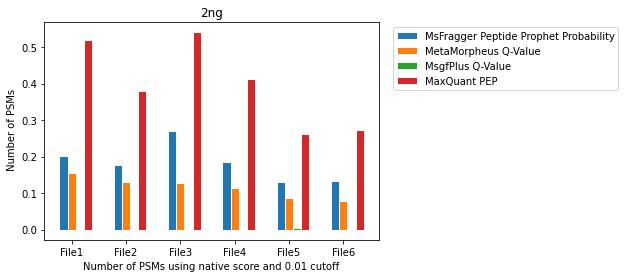

In [29]:
File1 = get_file_values("MokaPot/MegaScript_2ng_rep1.csv", 0.01)
File2 = get_file_values("MokaPot/MegaScript_2ng_rep2.csv", 0.01)
File3 = get_file_values("MokaPot/MegaScript_2ng_rep3.csv", 0.01)
File4 = get_file_values("MokaPot/MegaScript_2ng_rep4.csv", 0.01)
File5 = get_file_values("MokaPot/MegaScript_2ng_rep5.csv", 0.01)
File6 = get_file_values("MokaPot/MegaScript_2ng_rep6.csv", 0.01)

 
# set width of bars
barWidth = 0.15
 
# set heights of bars
msf_prob_2ng = [File1['msf'], File2['msf'], File3['msf'], File4['msf'], File5['msf'], File6['msf']]
MM_qval_2ng = [File1['MM_QVal'], File2['MM_QVal'], File3['MM_QVal'], File4['MM_QVal'], File5['MM_QVal'], File6['MM_QVal']]
msg_qval_2ng = [File1['msg_QVal'], File2['msg_QVal'], File3['msg_QVal'], File4['msg_QVal'], File5['msg_QVal'], File6['msg_QVal']]
mq_PEP_2ng = [File1['MQ_PEP'], File2['MQ_PEP'], File3['MQ_PEP'], File4['MQ_PEP'], File5['MQ_PEP'], File6['MQ_PEP']]


# Set position of bar on X axis
r1 = np.arange(len(msf_prob_2ng))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
plt.bar(r1, msf_prob_2ng, width=barWidth, edgecolor='white', label='MsFragger Peptide Prophet Probability')
plt.bar(r2, MM_qval_2ng, width=barWidth, edgecolor='white', label='MetaMorpheus Q-Value')
plt.bar(r3, msg_qval_2ng, width=barWidth, edgecolor='white', label='MsgfPlus Q-Value')
plt.bar(r4, mq_PEP_2ng, width=barWidth, edgecolor='white', label='MaxQuant PEP')
 
# Add xticks on the middle of the group bars
plt.ylabel(' Number of PSMs')
plt.xlabel('Number of PSMs using native score and 0.01 cutoff')
plt.title('2ng')
plt.xticks([r + barWidth for r in range(len(msf_prob_2ng))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'])
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.73, 1))
figure1_1 = plt.gcf()
plt.show()


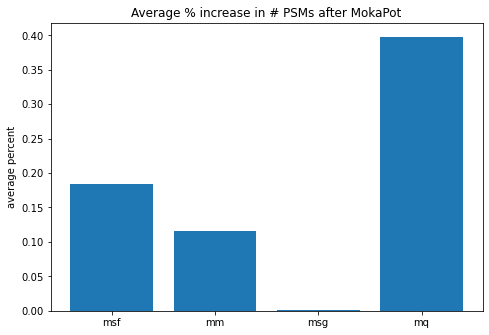

In [30]:
import statistics as stats
#getting the average % increase of PSMs after MokaPot
msf_avg = stats.mean(msf_prob_2ng)
mm_avg = stats.mean(MM_qval_2ng)
msg_avg = stats.mean(msg_qval_2ng)
mq_avg = stats.mean(mq_PEP_2ng)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
increases = [msf_avg, mm_avg, msg_avg, mq_avg]
tools = ['msf', 'mm', 'msg', 'mq']
ax.bar(tools, increases)
plt.ylabel('average percent')
#plt.xlabel('Number of PSMs using native score and 0.01 cutoff')
plt.title('Average % increase in # PSMs after MokaPot')
plt.show()

In [32]:
print("MM avg: " + str(mm_avg))
print("msg avg: " + str(msg_avg))
print("msf_avg: " + str(msf_avg))
print("mq_avg: " + str(mq_avg))

MM avg: 0.11526412358685195
msg avg: 0.001099581776723775
msf_avg: 0.18344271595220346
mq_avg: 0.3980711385252532


Doing calculations and graphs for the 0.2ng data

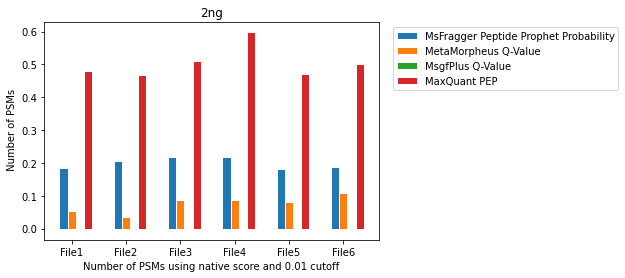

In [35]:
File7 = get_file_values("MokaPot/MegaScript_0.2ng_rep1.csv", 0.01)
File8 = get_file_values("MokaPot/MegaScript_0.2ng_rep2.csv", 0.01)
File9 = get_file_values("MokaPot/MegaScript_0.2ng_rep3.csv", 0.01)
File10 = get_file_values("MokaPot/MegaScript_0.2ng_rep4.csv", 0.01)
File11 = get_file_values("MokaPot/MegaScript_0.2ng_rep5.csv", 0.01)
File12 = get_file_values("MokaPot/MegaScript_0.2ng_rep6.csv", 0.01)

 
# set width of bars
barWidth = 0.15
 
# set heights of bars
msf_prob_02ng = [File7['msf'], File8['msf'], File9['msf'], File10['msf'], File11['msf'], File12['msf']]

MM_qval_02ng = [File7['MM_QVal'], File8['MM_QVal'], File9['MM_QVal'], File10['MM_QVal'], File11['MM_QVal'], File12['MM_QVal']]

msg_qval_02ng = [File7['msg_QVal'], File8['msg_QVal'], File9['msg_QVal'], File10['msg_QVal'], File11['msg_QVal'], File12['msg_QVal']]

mq_PEP_02ng = [File7['MQ_PEP'], File8['MQ_PEP'], File9['MQ_PEP'], File10['MQ_PEP'], File11['MQ_PEP'], File12['MQ_PEP']]


# Set position of bar on X axis
r1 = np.arange(len(msf_prob_02ng))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
plt.bar(r1, msf_prob_02ng, width=barWidth, edgecolor='white', label='MsFragger Peptide Prophet Probability')
plt.bar(r2, MM_qval_02ng, width=barWidth, edgecolor='white', label='MetaMorpheus Q-Value')
plt.bar(r3, msg_qval_02ng, width=barWidth, edgecolor='white', label='MsgfPlus Q-Value')
plt.bar(r4, mq_PEP_02ng, width=barWidth, edgecolor='white', label='MaxQuant PEP')
 
# Add xticks on the middle of the group bars
plt.ylabel(' Number of PSMs')
plt.xlabel('Number of PSMs using native score and 0.01 cutoff')
plt.title('2ng')
plt.xticks([r + barWidth for r in range(len(msf_prob_02ng))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'])
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.73, 1))
figure1_1 = plt.gcf()
#figure1_1.savefig('2ng_PSM_native_score.png', dpi=300, bbox_inches='tight')
plt.show()

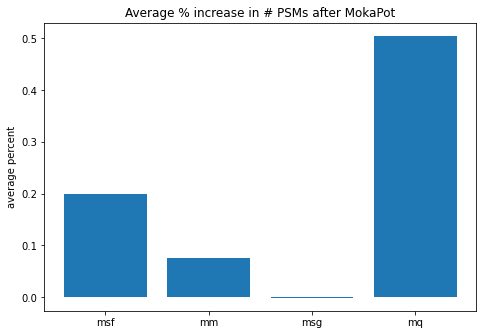

In [37]:
import statistics as stats
#getting the average % increase of PSMs after MokaPot
msf_avg = stats.mean(msf_prob_02ng)
mm_avg = stats.mean(MM_qval_02ng)
msg_avg = stats.mean(msg_qval_02ng)
mq_avg = stats.mean(mq_PEP_02ng)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
increases = [msf_avg, mm_avg, msg_avg, mq_avg]
tools = ['msf', 'mm', 'msg', 'mq']
ax.bar(tools, increases)
plt.ylabel('average percent')
#plt.xlabel('Number of PSMs using native score and 0.01 cutoff')
plt.title('Average % increase in # PSMs after MokaPot')
plt.show()

In [38]:
print("MM avg: " + str(mm_avg))
print("msg avg: " + str(msg_avg))
print("msf_avg: " + str(msf_avg))
print("mq_avg: " + str(mq_avg))

MM avg: 0.07544962441812451
msg avg: -0.0009413467196535334
msf_avg: 0.1991745220549629
mq_avg: 0.5048819867564056
